<a href="https://colab.research.google.com/github/dsaldana/reinforcement-learning-course/blob/main/lab4_dyna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: TD and Dyna




## Exercise 1: Implement SARSA with n-step TD (n=5) on CliffWalking

**Objective:**  
In this exercise, you will implement the **SARSA algorithm** using **n-step temporal-difference learning with n=5**. You will apply your implementation to the **CliffWalking environment** in Gymnasium, and analyze how multi-step returns influence learning compared to standard 1-step SARSA.

---

### Environment
- Use `CliffWalking-v1`

---

### Instructions
1. Implement **SARSA with n-step TD updates (n=5)**:
   - Maintain an action-value table \(Q(s,a)\).
   - Use ε-greedy exploration.
   - Store states, actions, and rewards for the last 5 steps.
   - After each step, compute the n-step return: G_t
   - Update \(Q(s_t,a_t)\) toward \(G_t\).

2. Train your agent for several thousand episodes (e.g., 5,000).

3. Plot the **episode rewards over time** to visualize learning progress.

4. Compare qualitatively with 1-step SARSA:
   - Does n-step SARSA converge faster or slower?
   
   n-step SARSA converges significantly faster than the standard 1-step version. While 1-step SARSA takes around 1500 episodes to converge, the n-step method converges within roughly 10 episodes, highlighting the strong impact of the step numbers. Moreover, 5-step SARSA not only converges more quickly but also achieves higher average returns than the 1-step variant.

   - How do the policies differ near the cliff?
   
   The policy learned with 5-step SARSA is more stable and cautious compared to 1-step SARSA. In particular, it avoids making moves toward the cliff, resulting in a safer and more reliable policy.


---

### Deliverables
- Python code implementing SARSA with TD(5) (notebook in Github).  
- A plot of episode number vs episode return (plot in a cell below).  
- A short discussion (1 paragraph) comparing the results with standard SARSA.  


100%|██████████| 1000/1000 [00:01<00:00, 884.72it/s]


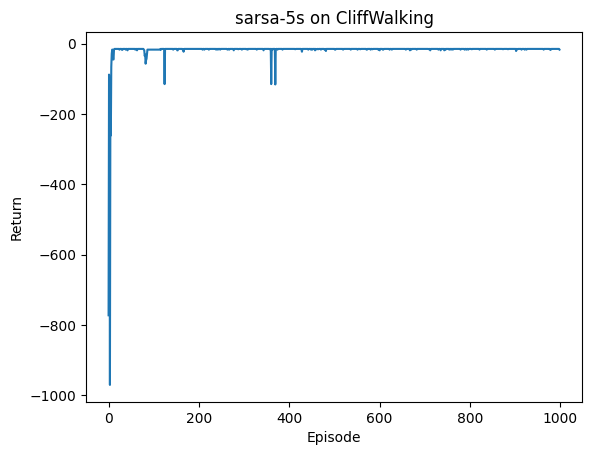

[-772, -88, -152, -970, -176, -261, -66, -29, -17, -17, -45, -45, -17, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -17, -15, -15, -15, -15, -17, -15, -17, -15, -15, -15, -15, -15, -15, -17, -15, -15, -15, -19, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -17, -15, -15, -15, -19, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -17, -19, -35, -31, -57, -47, -43, -29, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -15, -17, -15, -15, -15, -15, -15, -15, -15, -115, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -17, -15, -15, -15, -15, -15, -15, -15, -15, -19, -19, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -17, -17, -23, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15

In [50]:

from tqdm import tqdm
import numpy as np
import gymnasium as gym
from collections import deque
import matplotlib.pyplot as plt

def sarsa_nstep(n_step = 5, n_episodes = 500):
  # Environment
  env = gym.make("CliffWalking-v1")

  # Parameters
  n_states = env.observation_space.n
  n_actions = env.action_space.n
  alpha = 0.1           # step size (learning rate)
  gamma = 0.99          # discount factor
  epsilon = 0.01         # epsilon for epsilon-greedy policy

  # Initialize Q-table
  Q = np.zeros((n_states, n_actions))

  def epsilon_greedy(state):
      """Choose an action using epsilon-greedy policy."""
      if np.random.rand() < epsilon:
          return np.random.randint(n_actions)
      else:
          # find all actions with the maximum Q-value
          max_actions = np.where(Q[state] == np.max(Q[state]))[0]
          return np.random.choice(max_actions)  # random tie-breaker

  # Track returns
  episode_returns = []

  for ep in tqdm(range(n_episodes)):

      # Buffers to store the trajectory
      states = []
      actions = []
      rewards = []

      state, _ = env.reset()
      states.append(state)
      action = epsilon_greedy(state)
      actions.append(action)
      rewards.append(0)

      T = float("inf")
      t = 0

      while True:
          if t < T:
              # Take real step in the environment
              action_t = actions[t]
              next_state, reward, terminated, truncated, _ = env.step(action_t)
              states.append(next_state)
              rewards.append(reward)

              done = terminated or truncated
              if done:
                  T = t + 1
              else:
                  action_next = epsilon_greedy(next_state)
                  actions.append(action_next)

          # Time index for state/action to update
          tau = t - n_step + 1
          if tau >= 0:
              # TODO: Compute the n-step return G for state tau
              # Hint: use rewards[tau : tau+n] plus Q(s_t+n, a_t+n) if not terminal

              # Example structure:
              G = 0.0
              # accumulate discounted rewards
              for i in range(tau+1, min(tau + n_step, T)):
                  G += (gamma ** (i - tau - 1)) * rewards[i]
              if tau + n_step < T:
                  # print(f"{len(states)=}")
                  # print(f"{tau + n_step=}")
                  s_tau_n = states[tau + n_step]
                  a_tau_n = actions[tau + n_step]
                  G += (gamma ** n_step) * Q[s_tau_n, a_tau_n]

              # TODO: Update Q[states[tau], actions[tau]] toward G
              Q[states[tau], actions[tau]] += alpha * (G - Q[states[tau], actions[tau]])

          if tau == T - 1:
              break

          t += 1

      episode_returns.append(sum(rewards))
  return episode_returns, Q

sarsa5s_ep_rewards, sarsa5s_q = sarsa_nstep(n_episodes=1000)

def plot_learning_curve(rewards, model_name):
  # Plot learning curve
  plt.plot(rewards)
  plt.xlabel("Episode")
  plt.ylabel("Return")
  plt.title(f"{model_name} on CliffWalking")
  plt.show()
  print(rewards)
plot_learning_curve(sarsa5s_ep_rewards[1:], 'sarsa-5s')


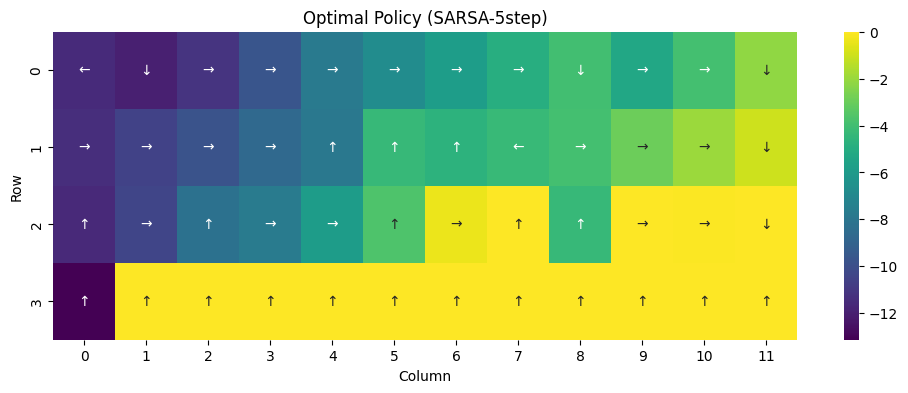

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_policy(Q, title="SARSA-5step", n_actions=4, fig_size=(12,4)):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=fig_size)
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA-5step)")
  plt.show()
plot_policy(sarsa5s_q)

## Exercise 2: Dyna-Q for CliffWalking

**Objective**  
Implement **Dyna-Q** on **CliffWalking-v1** and compare its learning performance to **SARSA (1-step)** and **SARSA TD(5)**. You will analyze sample efficiency, stability near the cliff, and sensitivity to planning steps.

---

### Environment
- Use `CliffWalking-v1`
---

### Part A — Dyna-Q (Implementation)
1. **Q-table**: maintain `Q[s, a]` (tabular).
2. **Model**: learn an empirical model from experience.
   - For each observed transition `(s, a, r, s')`, update a dictionary:
     - Minimal: store the most recent `(s', r)` for `(s, a)`, **or**
     - Advanced: store a **multiset** of outcomes for `(s, a)` with counts (to sample stochastically).
3. **Real update (Q-learning)** after each env step:
   Q(s,a) ← Q(s,a) + α * (r + γ * max_a' Q(s',a') - Q(s,a))
4. **Planning updates**: after each real step, perform `N` simulated updates:
   - Sample a previously seen `(s_p, a_p)` from the model.
   - Sample `(r_p, s'_p)` from that entry.
   - Apply the same Q-learning backup using `(s_p, a_p, r_p, s'_p)`.
5. Use epsilon-greedy exploration.

---

### Part B — Baselines (Re-use / Implement)
- **SARSA (1-step)** with ε-greedy:
  \[
  Q(s,a) \leftarrow Q(s,a) + \alpha\big[r + \gamma Q(s',a') - Q(s,a)\big]
  \]
- **SARSA TD(5)** (n-step SARSA with \(n=5\)), as in Exercise 1.

Use the **same** γ, α, ε schedule, and number of episodes for a fair comparison.

---

### Part C — Experiments & Comparisons
1. **Learning curves**: plot **episode index vs. episode return** for:
   - Dyna-Q with \(N \in \{5, 20, 50\}\)
   - SARSA (1-step)
   - SARSA TD(5)
2. **Sample efficiency**: report the **episode number** at which the average return over a sliding window (e.g., 100 episodes) first exceeds a chosen threshold (e.g., −30).
3. **Stability near the cliff**: qualitatively inspect trajectories/policies; does the method hug the cliff or leave a safer margin?
4. **Sensitivity to planning steps**: compare Dyna-Q across N; discuss diminishing returns vs. computation.
5. **Statistical robustness**: run **≥5 seeds**; plot mean ± std (shaded) or report mean ± std of final returns.

---

### Deliverables
- **Code**: A driver script/notebook that reproduces your plots
- **Plots** (embedded in the notebook):
  - Learning curves (mean ± std across seeds)
  - Optional: heatmap of greedy policy/actions on the grid




100%|██████████| 500/500 [00:02<00:00, 245.52it/s]


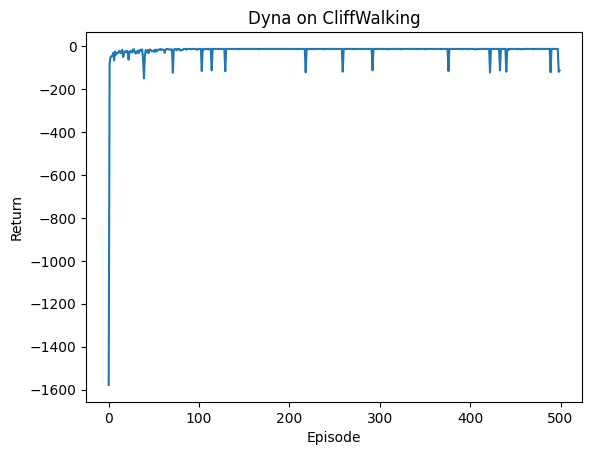

[-1578, -82, -51, -47, -47, -31, -67, -25, -40, -33, -33, -26, -22, -33, -25, -17, -51, -35, -24, -27, -22, -27, -63, -27, -22, -28, -29, -15, -15, -29, -35, -27, -22, -33, -19, -17, -22, -15, -55, -150, -48, -18, -27, -19, -33, -16, -16, -21, -24, -21, -26, -17, -26, -16, -22, -17, -17, -13, -18, -16, -16, -18, -31, -15, -13, -13, -16, -15, -15, -18, -15, -124, -19, -13, -14, -20, -13, -15, -13, -21, -17, -19, -17, -13, -13, -13, -17, -13, -13, -13, -13, -15, -13, -13, -13, -13, -13, -15, -17, -13, -13, -13, -13, -116, -13, -15, -15, -13, -13, -13, -16, -13, -13, -13, -113, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -14, -13, -13, -117, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -15, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -15, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -1

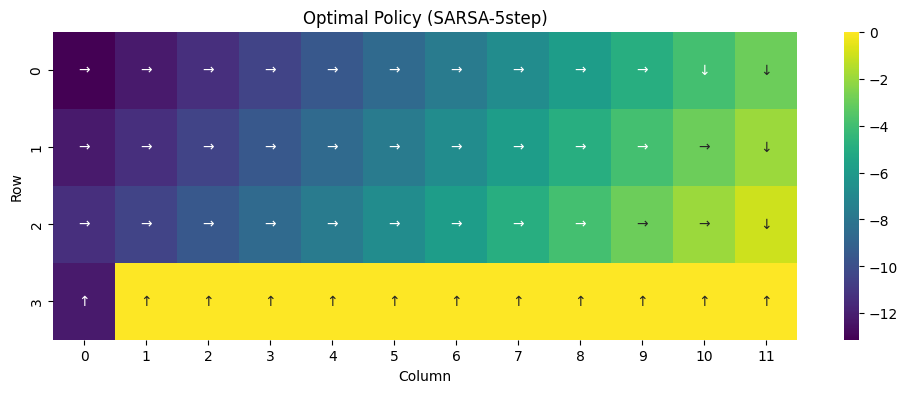

In [51]:


from tqdm import tqdm
import numpy as np
import gymnasium as gym
import random
import matplotlib.pyplot as plt

def dyna_cliff(planning_steps = 5, n_episodes = 500):
  # Environment
  env = gym.make("CliffWalking-v1")

  # Parameters
  n_states = env.observation_space.n
  n_actions = env.action_space.n
  alpha = 0.1           # step size (learning rate)
  gamma = 0.99          # discount factor
  epsilon = 0.01         # epsilon for epsilon-greedy policy

  def epsilon_greedy(state):
      """Choose an action using epsilon-greedy policy."""
      if np.random.rand() < epsilon:
          return np.random.randint(n_actions)
      else:
          max_actions = np.where(Q[state] == np.max(Q[state]))[0]
          return np.random.choice(max_actions)  # random tie-breaker

  # Track returns
  episode_returns = []

  # Initialize Q-table
  Q = np.zeros((n_states, n_actions))
  model = {s: {a: None for a in range(n_actions)} for s in range(n_states)}

  for _ in tqdm(range(n_episodes)):
      state, _ = env.reset()
      total_reward = 0
      done = False

      while not done:
          action = epsilon_greedy(state)
          next_state, reward, terminated, truncated, _ = env.step(action)
          done = terminated or truncated
          total_reward += reward
          # print(reward, action)

          Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
          model[state][action] = (reward, next_state)


          # Planning steps
          for _ in range(planning_steps):
              # randomly sample a previously seen (s,a)
              seen_sa = [(s, a) for s in range(n_states) for a in range(n_actions) if model[s][a] is not None]
              if len(seen_sa) == 0:
                  continue
              s_p, a_p = random.choice(seen_sa)
              r_p, s_next_p = model[s_p][a_p]
              Q[s_p, a_p] += alpha * (r_p + gamma * np.max(Q[s_next_p]) - Q[s_p, a_p])

          state = next_state

      episode_returns.append(total_reward)
  return episode_returns, Q

dyna_returns, dyna_q = dyna_cliff(n_episodes=500)

plot_learning_curve(dyna_returns, 'Dyna')
plot_policy(dyna_q, fig_size=(12,4))


## Exercise 3: Solve FrozenLake with Q-Learning and Dyna-Q (Stochastic Model)

**Objective**  
Implement and compare **Q-learning** and **Dyna-Q** on Gymnasium’s `FrozenLake-v1`.  
For Dyna-Q, your learned **transition model must handle multiple possible next states** per `(s, a)` (stochastic slip), i.e., store and sample **a distribution** over `(s', r)` outcomes rather than a single next state.

---

### Environment
- Use `FrozenLake-v1` from `gymnasium.envs.toy_text`.
- You can start with map 4×4; and then work with 8×8.
- Start → Goal with slippery transitions (stochastic).  
- Rewards: `+1` at goal, `0` otherwise (holes terminate with 0).

---

### Part A — Q-learning (baseline)
1. Maintain a tabular action-value function `Q[s, a]`.
2. Behavior: ε-greedy over `Q`.
3. Update after each real step:
   - target = r + γ * max_a' Q[s', a']   (if terminal: target = r)
   - Q[s, a] ← Q[s, a] + α * (target − Q[s, a])
4. Train for several thousand episodes (e.g., 5,000) with an ε schedule (e.g., 0.2 → 0.01).

---

### Part B — Dyna-Q with a **stochastic transition model**
1. **Empirical model (multinomial):** for each `(s, a)`, maintain a multiset of observed outcomes:
   - `model[(s, a)] = [(s'_1, r_1, count_1), (s'_2, r_2, count_2), ...]`
   - Update counts whenever you observe `(s, a, r, s')`.
2. **Real step update (Q-learning):** same as Part A.
3. **Planning steps (N per real step):**
   - Sample a previously seen `(s_p, a_p)` uniformly (or with priority).
   - Sample `(s'_p, r_p)` **from the empirical distribution** for `(s_p, a_p)` using counts as probabilities.
   - Apply the same Q-learning backup with `(s_p, a_p, r_p, s'_p)`.
4. Train with the same ε schedule and number of episodes; vary `N ∈ {5, 20, 50}`.

---

### Experiments & Analysis
1. **Learning curves:** plot episode index vs episode return (smoothed) for:
   - Q-learning
   - Dyna-Q (N=5, 20, 50)
2. **Sample efficiency:** report the episode at which the moving-average return (e.g., window 100) first exceeds a threshold (you choose a reasonable value).
3. **Effect of stochastic modeling:** briefly explain why storing a distribution over `(s', r)` matters on FrozenLake (slip), and what happens if you store only the most recent outcome.
4. **Robustness:** run ≥5 random seeds; report mean ± std of final evaluation returns.

---

### Deliverables
- **Code** for Q-learning and Dyna-Q (with stochastic model).  
- **Plots** of learning curves (include legend and axis labels).  
- ** Discussion:** why Dyna-Q helps here; impact of N; importance of modeling multiple next states.

---

### Hints
- For terminal transitions (goal/hole), the Q-learning target is simply `target = r` (no bootstrap).  
- When sampling from the model, use probabilities `p_i = count_i / sum_j count_j`.  
- Tie-break greedy action selection uniformly among argmax actions to avoid bias.  
- Keep evaluation **greedy (ε=0)** and consistent across methods (same seeds and episode counts).


In [73]:

import gymnasium as gym
import numpy as np
from tqdm import tqdm


def qlearning_fl(print_rewards=False, is_slippery=False, n_episodes = 10000):
  # Create the environment
  if is_slippery:
    env = gym.make("FrozenLake-v1", render_mode="ansi", is_slippery=True)
  else:
    env = gym.make("FrozenLake-v1", render_mode="ansi", map_name="8x8",)

  max_steps = 100     # safety cap

  # Q-learning parameters
  learning_rate = 0.1
  epsilon = 0.04
  discount_factor = 0.99
  n_actions = env.action_space.n
  n_states = env.observation_space.n
  Q = np.zeros((n_states, n_actions))
  rewards = []
  def get_e_greedy_action(e):
      epsilon_loc = e
      def get_action(q_loc, env_loc, state_loc):
          if np.random.random() < epsilon_loc:
              return env_loc.action_space.sample()
          else:
            max_actions = np.where(Q[state] == np.max(Q[state]))[0]
            return np.random.choice(max_actions)
      return get_action


  actin_selector = get_e_greedy_action(e=epsilon)

  for episode in tqdm(range(n_episodes)):
      done = False
      total_reward = 0
      state, info = env.reset()

      for step in range(max_steps):
        action = actin_selector(Q, env, state)
        next_state, reward, terminated, truncated, info = env.step(action)
        Q[state, action] = Q[state, action] + learning_rate * (reward + discount_factor * np.max(Q[next_state]) - Q[state, action])
        state = next_state
        total_reward += reward

        if terminated or truncated:
            break
      if (episode+1) % 1000 == 0:
          avg_reward = np.mean(rewards[-1000:])
          print(f"Episode {episode+1}, Average Reward (last 1000): {avg_reward}")
      rewards.append(total_reward)
  return Q, rewards, n_actions


  7%|▋         | 1043/15000 [00:02<00:45, 303.61it/s]

Episode 1000, Average Reward (last 1000): 0.004004004004004004


 14%|█▎        | 2039/15000 [00:06<00:57, 225.62it/s]

Episode 2000, Average Reward (last 1000): 0.03


 20%|██        | 3036/15000 [00:11<00:54, 218.46it/s]

Episode 3000, Average Reward (last 1000): 0.105


 27%|██▋       | 4021/15000 [00:15<01:00, 181.56it/s]

Episode 4000, Average Reward (last 1000): 0.216


 34%|███▎      | 5052/15000 [00:21<00:39, 255.02it/s]

Episode 5000, Average Reward (last 1000): 0.274


 40%|████      | 6024/15000 [00:27<00:46, 191.62it/s]

Episode 6000, Average Reward (last 1000): 0.332


 47%|████▋     | 7038/15000 [00:35<00:48, 163.71it/s]

Episode 7000, Average Reward (last 1000): 0.369


 54%|█████▎    | 8048/15000 [00:40<00:28, 240.27it/s]

Episode 8000, Average Reward (last 1000): 0.363


 60%|██████    | 9038/15000 [00:45<00:25, 234.03it/s]

Episode 9000, Average Reward (last 1000): 0.376


 67%|██████▋   | 10031/15000 [00:50<00:22, 222.25it/s]

Episode 10000, Average Reward (last 1000): 0.378


 74%|███████▎  | 11043/15000 [00:55<00:19, 205.03it/s]

Episode 11000, Average Reward (last 1000): 0.365


 80%|████████  | 12047/15000 [00:59<00:12, 235.51it/s]

Episode 12000, Average Reward (last 1000): 0.392


 87%|████████▋ | 13045/15000 [01:04<00:08, 238.86it/s]

Episode 13000, Average Reward (last 1000): 0.422


 94%|█████████▎| 14032/15000 [01:09<00:04, 199.01it/s]

Episode 14000, Average Reward (last 1000): 0.419


100%|██████████| 15000/15000 [01:13<00:00, 204.91it/s]


Episode 15000, Average Reward (last 1000): 0.494


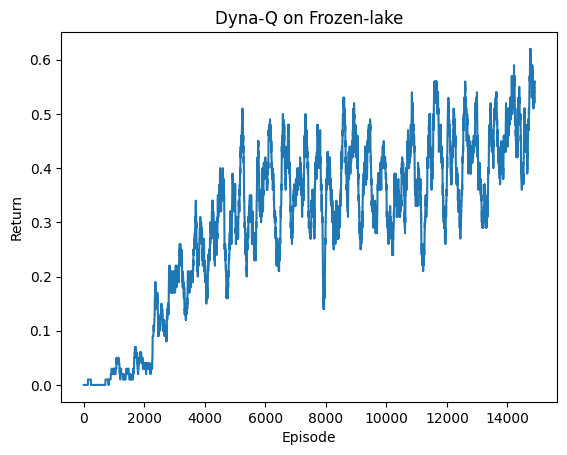

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0,

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_policy(Q, n_actions=4, title="Q-leanring, frozen lake"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 4, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)

  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(4, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title(f"Optimal Policy ({title})")
  plt.show()

qlearning_Q, qlearning_rewards, n_actions = qlearning_fl(True, False,n_episodes=15000)
#plot_policy(qlearning_Q, 4, "Q-leanring frozen lake")
# Plot learning curve
episode_returns_avg = moving_average(qlearning_rewards, 100)
plt.plot(episode_returns_avg)
plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Dyna-Q on Frozen-lake")
plt.show()
print(episode_returns)

In [87]:
from tqdm import tqdm
import numpy as np
import gymnasium as gym
import random
import matplotlib.pyplot as plt

def dyna_statistic(n_episods=5):
      # Environment
      env = gym.make("FrozenLake-v1")

      # Parameters
      n_states = env.observation_space.n
      n_actions = env.action_space.n
      alpha = 0.1           # step size (learning rate)
      gamma = 0.99          # discount factor
      epsilon = 0.04         # epsilon for epsilon-greedy policy
      planning_steps = 100

      def epsilon_greedy(state):
          """Choose an action using epsilon-greedy policy."""
          if np.random.rand() < epsilon:
              return np.random.randint(n_actions)
          else:
            max_actions = np.where(Q[state] == np.max(Q[state]))[0]
            return np.random.choice(max_actions)

      # Track returns
      episode_returns = []

      # Initialize Q-table
      Q = np.zeros((n_states, n_actions))
      model = {s: {a: {} for a in range(n_actions)} for s in range(n_states)}

      for episode in tqdm(range(n_episods)):
          state, _ = env.reset()
          total_reward = 0
          done = False

          while not done:
              action = epsilon_greedy(state)
              next_state, reward, terminated, truncated, _ = env.step(action)
              done = terminated or truncated
              total_reward += reward
              # print(reward, action)

              Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
              if (reward, next_state) in list(model[state][action].keys()):
                  model[state][action][(reward, next_state)] += 1
              else:
                  model[state][action].update({(reward, next_state): 1})

              # Planning steps
              for _ in range(planning_steps):
                  # randomly sample a previously seen (s,a)


                  s_p = random.choice(list(model.keys()))
                  a_p = random.choice(list(model[s_p].keys()))

                  if len(model[s_p][a_p]):
                      r_p, s_next_p = random.choice(list(model[s_p][a_p].keys()))
                  else:
                      continue


                  Q[s_p, a_p] += alpha * (r_p + gamma * np.max(Q[s_next_p]) - Q[s_p, a_p])

              state = next_state


          episode_returns.append(total_reward)
          if (episode+1) % 1000 == 0:
              avg_reward = np.mean(episode_returns[-1000:])
              print(f"Episode {episode+1}, Average Reward (last 1000): {avg_reward}")
      return Q, episode_returns


100%|██████████| 50/50 [00:00<00:00, 309.84it/s]


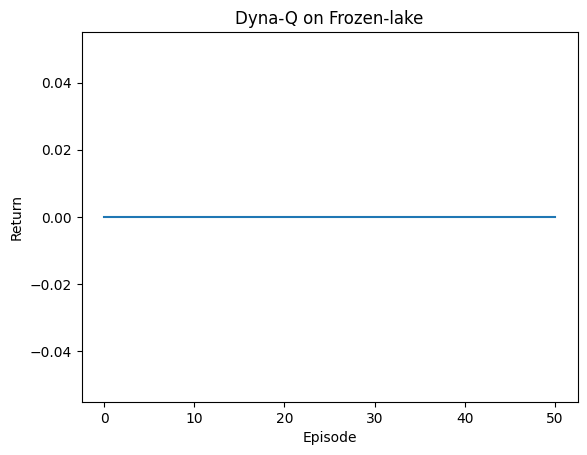

100%|██████████| 500/500 [00:09<00:00, 52.88it/s]


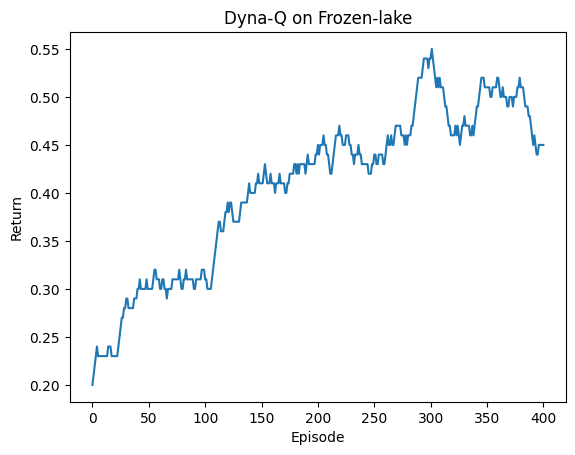

100%|██████████| 1000/1000 [00:21<00:00, 45.68it/s]


Episode 1000, Average Reward (last 1000): 0.423


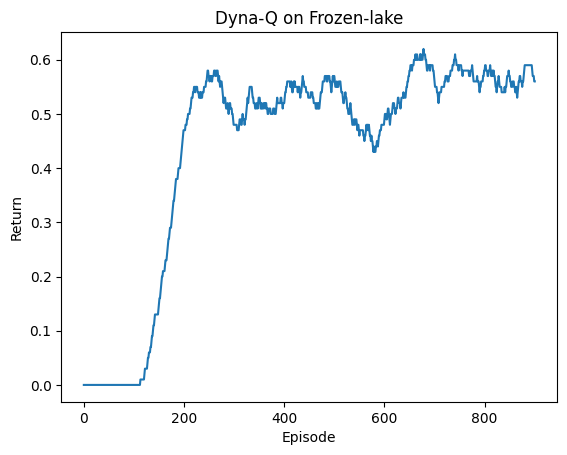

In [92]:

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

for i in [50, 500, 1000]:
    dyna_q, dyna_returns = dyna_statistic(n_episods=i)
    # Plot learning curve
    episode_returns_avg = moving_average(dyna_returns, 100)
    plt.plot(episode_returns_avg)
    plt.xlabel("Episode")
    plt.ylabel("Return")
    plt.title("Dyna-Q on Frozen-lake")
    plt.show()
    #print(episode_returns)